In [23]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

# Model Regression
from sklearn.linear_model import Lasso

In [2]:
# Data extraction
data = pd.read_csv('../dataset/king_country_houses_aa.csv')
df = data.copy()
df.head(10) # Exploring the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
num_df = df.drop(columns = ['id', 'date'])
num_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# select continuous variables
continuous_df = num_df.loc[:, num_df.nunique() > 20]
continuous_df

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.00,1180,5650,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,2.25,2570,7242,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,1.00,770,10000,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,3.00,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,2.00,1680,8080,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530,1131,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,2.50,2310,5813,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,0.75,1020,1350,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,2.50,1600,2388,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Dealing with multicollinearity

In [5]:
# Move the price column (target) to the last position for better analysis 
continuous_df= continuous_df[['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15','price']]
continuous_df.head(5)

,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1.00,1180,5650,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2.25,2570,7242,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,1.00,770,10000,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,3.00,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2.00,1680,8080,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [6]:
num_corr = round(continuous_df.corr(), 2)

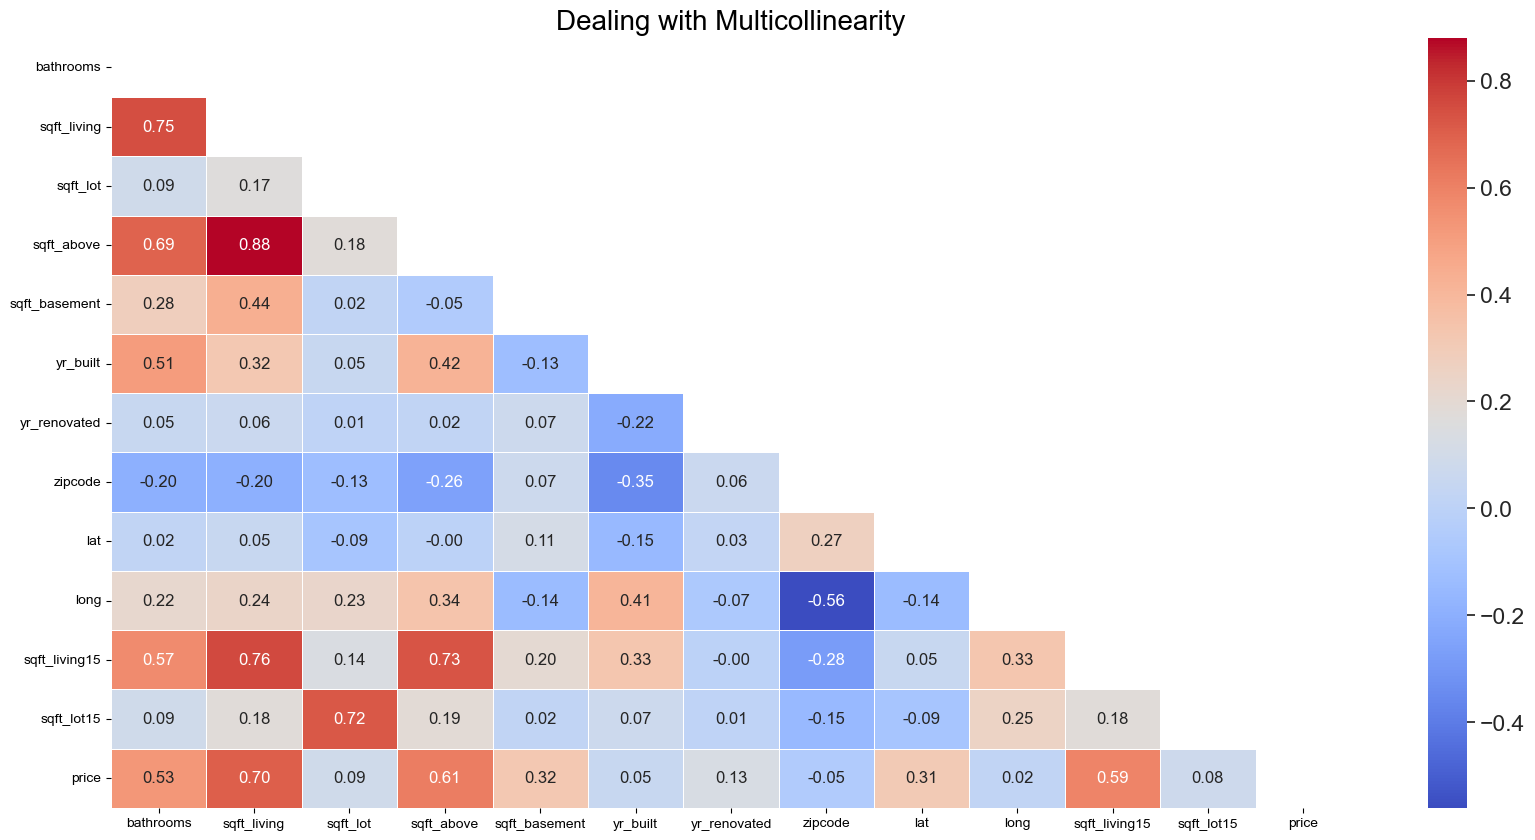

In [7]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

- `sqft_lot` has a high correlation with `sqft_lot15` fordoing the regression we will take it out
- `zipcode` has a moderate negative relationship with `long`

In [19]:
ml_df = continuous_df.drop(columns=['sqft_lot', 'zipcode'])
ml_df

,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,1.00,1180,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,2.25,2570,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,1.00,770,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,3.00,1960,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,2.00,1680,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,1530,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,2.50,2310,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,0.75,1020,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,2.50,1600,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


<h1 style="color: #00aaff;">01 | Modeling</h1>

### X-y Split

In [20]:
# Split X and y
X = ml_df.drop(columns="price")
y = ml_df.price

### Train-test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42) 

In [22]:
print(f'100% of our data: {len(ml_df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h2 style="color: #00aaff;">Selecting the model: Lasso Regression</h2>

In [24]:
model = Lasso()

In [25]:
model.fit(X_train, y_train)

Lasso()

In [26]:
predictions_lasso = model.predict(X_test)

<h2 style="color: #00aaff;">Model Validation</h2>

In [43]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = root_mean_squared_error(y_test, predictions_lasso)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [45]:
# Create a dataframe with the metrics
lasso_metrics_df = pd.DataFrame({
    'Metrics': ['R2', 'RMSE', 'MSE', 'MAE'],
    'Values': [r2_3_3, RMSE_3_3, MSE_3_3, MAE_3_3],
})

# Set pandas display option to prevent scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
lasso_metrics_df

,Metrics,Values
0,R2,0.6029
1,RMSE,239444.6447
2,MSE,57333737858.6098
3,MAE,147605.5288
